In [1]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_val, X_train = X_train_full[:5000] /  255.0, X_train_full[5000:] / 255.0 # scaling the pixel intensity down to values between 0-1 for Gradient Descent
y_val, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [2]:
model = keras.models.Sequential() # model for neural network with a single stack of layers sequentially connected.
model.add(keras.layers.Flatten(input_shape= [28, 28])) # The first layer. flatten: convers input images into a 1D array.
model.add(keras.layers.Dense(300, activation= "relu")) # A hidden layer with 300 neurons using ReLu as the activation function.
model.add(keras.layers.Dense(100, activation= "relu"))
model.add(keras.layers.Dense(10, activation= "softmax")) # A layer using softmax as the activation function.

In [3]:
# The following is equivalent to the previous:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape= [28, 28]),
    keras.layers.Dense(300, activation= "relu"),
    keras.layers.Dense(100, activation= "relu"),
    keras.layers.Dense(10, activation= "softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.layers # shows the list of layers
weights, biases = model.layers[1].get_weights()
# print(weights)
# print(weights.shape)
# print(biases)
# print(biases.shape)

In [5]:
# Model compiling
# must call compile() to specify the loss function and the optimizer
model.compile(loss= "sparse_categorical_crossentropy", # using it b/c we have sparse labels and exclusive classes.
                                                       # if we had one target prob like one-hot vectors, use "categorical+crossentropy" instead.
                                                       # if we had a binary classification, them use "binary_crossentropy"
            optimizer=keras.optimizers.SGD(lr=0.01), # train using stochastic GD, perform backpropagation algorithm
            metrics=["accuracy"]) 

In [18]:
# training and evaluating the model
history=  model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
# or can use
# history=  model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 69us/sample - loss: 0.7026 - accuracy: 0.7667 - val_loss: 0.5036 - val_accuracy: 0.8300
Epoch 2/10
55000/55000 [==============================] - 4s 64us/sample - loss: 0.4859 - accuracy: 0.8311 - val_loss: 0.4448 - val_accuracy: 0.8500
Epoch 3/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.4419 - accuracy: 0.8457 - val_loss: 0.4131 - val_accuracy: 0.8610
Epoch 4/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.4140 - accuracy: 0.8549 - val_loss: 0.4022 - val_accuracy: 0.8652
Epoch 5/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.3935 - accuracy: 0.8614 - val_loss: 0.3787 - val_accuracy: 0.8668
Epoch 6/10
55000/55000 [==============================] - 4s 66us/sample - loss: 0.3783 - accuracy: 0.8668 - val_loss: 0.3860 - val_accuracy: 0.8674
Epoch 7/10
55000/55000 [==============================] -

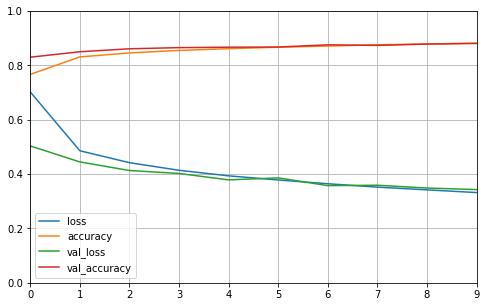

In [20]:
# visualization
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0, 1]
plt.show()

In [21]:
model.evaluate(X_test, y_test)

[56.96922225494385, 0.8447]

In [6]:
# Using the model to make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)
y_pred = model.predict_classes(X_new)
y_pred
import numpy as np
print(np.array(class_names)[y_pred])
y_new = y_test[:3]
y_new == y_pred  

['Bag' 'Sandal' 'Ankle boot']


array([False, False, False])